# Pakistan Book Orders

## Content

1. Import Libraries and dataset
2. Merge Datasets and Data cleansing
3. Best Selling Book
4. Visualizing Order Status Frequency
5. Book Orders by City
6. Issues with the Dataset

## Background

This is the one of its kinds book sales dataset from Pakistan. It contains 20,000 book orders from January 2019 to January 2021. The data was collected from the merchant (Gufhtugu Publications www.Gufhtugu.com) who are partner in this research study.
There is a dire need for such dataset to learn about Pakistan’s emerging e-commerce potential and I hope this will help many startups in many ways.

Content
Geography: Pakistan

Time period: 01/2019 – 01/2021

Unit of analysis: E-Commerce Orders

Dataset: The dataset contains detailed information of 200,000 online book orders in Pakistan from January 2019 to January 2021. It contains order number, order status (completed, cancelled, returned), order date and time, book name and city address. This is the most detailed dataset about e-commerce orders in Pakistan that you can find in the Public domain.

Variables: The dataset contains order number, order status, book name, order date, order time and city of the customer.

Source: https://www.kaggle.com/zusmani/gufhtugu-publications-dataset-challenge

### 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
orders1 = pd.read_csv("GPOrders2.csv", encoding = 'cp1252')
orders2 = pd.read_csv("GPOrders4.csv", encoding = 'utf-8')
orders3 = pd.read_csv("GPOrders5.csv", encoding = 'utf-8')

Based on the preliminary analysis of the 3 different datasets, the last dataset ("orders3") has 3 additional columns:<br>
- Payment Method
- Total items
- Total weight (grams)<br>

For the purposes of our current analysis, we will remove these columns. The "Orders3" dataset will be analyzed separately.

### 2. Merge Datasets and Data Cleansing

In [3]:
# Rename 2 columns in orders3
orders3.rename(columns = {"Order Date & Time":"Order Date",
                         "City":"City (Billing)"}, inplace = True)
# Remove 3 columns in orders3
orders3.drop(["Payment Method", "Total items", "Total weight (grams)"], axis = 1,inplace = True)

#Merge Datasets
df = pd.concat([orders1,orders2,orders3], ignore_index=True)
len(df) == len(orders1)+len(orders2)+len(orders3)

True

In [4]:
# Lower case names for books and cities for ease of use
df['Book Name'] = df['Book Name'].str.lower()
df['City (Billing)'] = df['City (Billing)'].str.lower()

# Change 'Canceled' in Order Status to 'Cancelled'
df['Order Status'].loc[(df['Order Status'] == 'Canceled')] = 'Cancelled'

D:\Spyder\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 3. Best Selling Book

In [5]:
pivot = df.pivot_table("Order Number", ["Book Name"], "Order Status", 
                       aggfunc = 'count').fillna(0).sort_values('Completed',ascending = False)
pivot['Total Sales'] = pivot["Cancelled"] + pivot["Completed"] + pivot["Returned"]
pivot["Returned(%)"] = pivot['Returned'] / pivot['Total Sales']
pivot["Sales Retention(%)"] = pivot['Completed'] / pivot['Total Sales']
pivot.head(5)

Order Status,Cancelled,Completed,Returned,Total Sales,Returned(%),Sales Retention(%)
Book Name,,,,,,
انٹرنیٹ سے پیسہ کمائیں,3.0,4370.0,780.0,5153.0,0.151368,0.848050
python programming,4.0,4302.0,308.0,4614.0,0.066753,0.932380
product management,22.0,3027.0,74.0,3123.0,0.023695,0.969260
"blockchain, cryptocurrency and bitcoin",25.0,2865.0,305.0,3195.0,0.095462,0.896714
justju ka safar-1,4.0,2619.0,20.0,2643.0,0.007567,0.990919


We see the best selling book is انٹرنیٹ سے پیسہ کمائیں	. However, the book is also the most returned book out of the top 5 best selling books on the platform. The return / cancelled percentage as shown above is 15.8% as compared to the other top selling books. The other books have a higher sales retention percentage which would more positively impact the bottom line of the company.

In [6]:
pivot[pivot['Total Sales'] >= 1000].sort_values('Sales Retention(%)', ascending = False).head(5)

Order Status,Cancelled,Completed,Returned,Total Sales,Returned(%),Sales Retention(%)
Book Name,,,,,,
justju ka safar-1,4.0,2619.0,20.0,2643.0,0.007567,0.990919
molo masali,1.0,1239.0,26.0,1266.0,0.020537,0.978673
product management,22.0,3027.0,74.0,3123.0,0.023695,0.969260
sukkur to florida,0.0,1023.0,33.0,1056.0,0.031250,0.968750
artificial intelligence,16.0,2589.0,93.0,2698.0,0.034470,0.959600


Based on another analysis, where books above 1,000 total sales are filtered, we can also see that certain books have a higher sales retention (%). This would ultimately result in higher sales, and fewer returns. It might be wiser for the e-commerce website to stock additional units of these books

### 4. Visualizing Order Status Frequency

In [7]:
# Obtain the year, month, day and day of week for the dataset
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df['day'] = pd.DatetimeIndex(df['Order Date']).day
df['dayofweek'] = pd.DatetimeIndex(df['Order Date']).dayofweek
# Obtain the hour
df['hour'] = pd.DatetimeIndex(df['Order Date']).hour

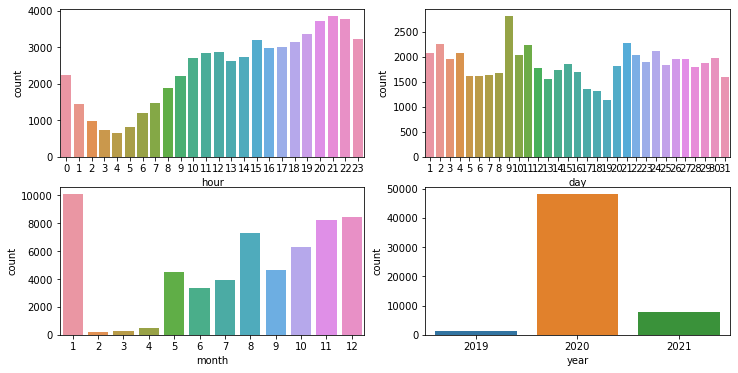

In [8]:
f, axes = plt.subplots(2,2, figsize = (12,6))
g1 = sns.countplot(x = df['hour'], ax = axes[0,0])
g2 = sns.countplot(x = df['day'], ax = axes[0,1])
g3 = sns.countplot(x = df['month'], ax = axes[1,0])
g4 = sns.countplot(x = df['year'], ax = axes[1,1])

As shown by the first graph, the website would experience higher traffic in the later hours of the day (6pm onwards). This would most likely be from people coming back from work and shopping online. There also seems to be higher sales in the first month and the majority of the sales have happened in the year 2020. This will be explored further later on

D:\Spyder\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Spyder\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='month', ylabel='hour'>

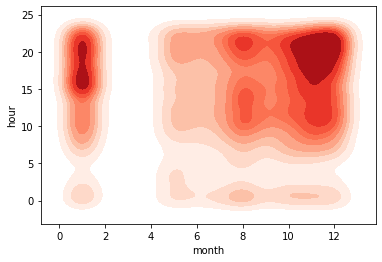

In [9]:
sns.kdeplot(df['month'], df['hour'], shade = True, shade_lowest = False, cmap = 'Reds')

From the above, we can notice that the first and last few months have the highest sales of books. The concentration of sales is mainly from November to January. This may be due to college / high school students buying new books for the semester

### 5. Book Orders by City

In [10]:
df['City (Billing)'].value_counts().head(10)

karachi       8011
lahore        6540
islamabad     2841
rawalpindi    2086
faisalabad    1567
peshawar      1479
multan        1386
gujranwala     834
hyderabad      795
quetta         756
Name: City (Billing), dtype: int64

For the purposes of the study, we will choose cities that have total sales of above 1000 books. The following cities will be used:
- Karachi
- Lahore
- Islamabad
- Rawalpindi
- Faisalabad
- Peshawar
- Multan

In [11]:
# Create the cities dataset
cities_df = df[df['City (Billing)'].isin(['karachi','lahore','islamabad','rawalpindi','faisalabad',
                                          'peshawar','multan'])]

Text(0.5, 1.0, 'Average Sales (by Day) for the Largest Cities')

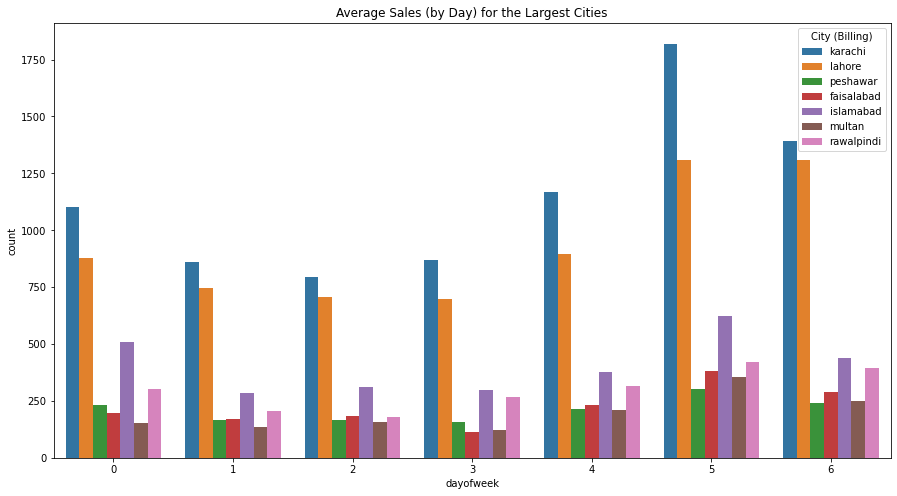

In [12]:
# Day of Week Plot by City
# Please note that Monday = 0 and Sunday = 6
plt.figure(figsize=(15,8))
sns.countplot(x = cities_df['dayofweek'], hue = cities_df['City (Billing)'])
plt.title('Average Sales (by Day) for the Largest Cities')

From the plot above, we see that there is an increase in sales on Saturday (5) and Sunday (6) especially in the two largest cities (Karachi and Lahore). This would indicate that most shoppers will buy books on those two days and online bookstores should expect a high volume of sales during the weekend.

Text(0.5, 1.0, 'Average Weekly Book Sales by Hour (After 10am)')

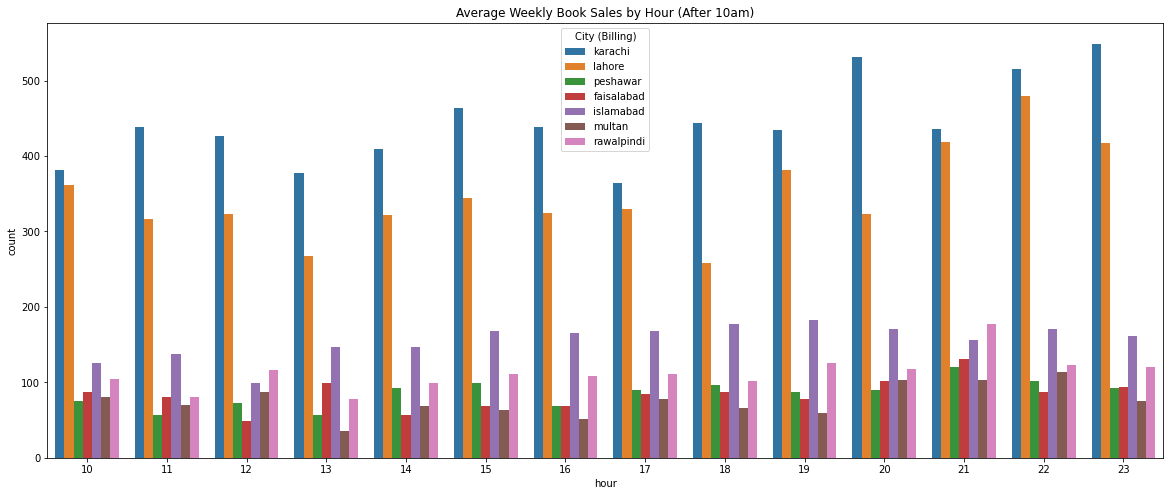

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x = cities_df[cities_df['hour'] >= 10]['hour'], hue = cities_df['City (Billing)'])
plt.title('Average Weekly Book Sales by Hour (After 10am)')

For the purposes of the study, we see that the average daily hours people usually buy is at night 8pm onwards. This would indicate, once again that for the largest cities, resources should be allocated towards the latter half of the day to ensure a seamless buying process for customers.

Text(0.5, 1.0, 'Average Sales for Saturday and Sunday')

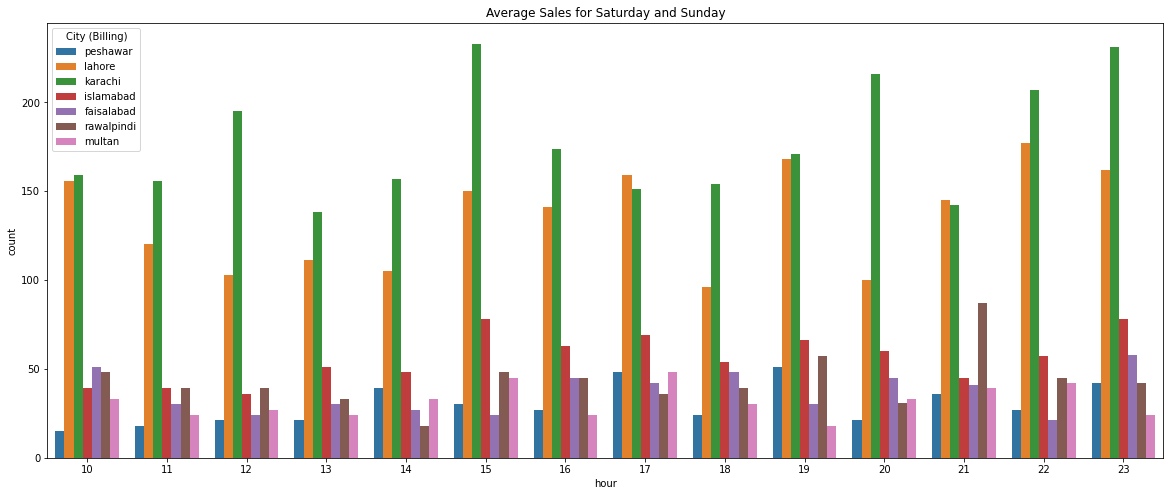

In [14]:
# Average book sales for Saturday and Sunday
plt.figure(figsize=(20,8))
sns.countplot(data = cities_df[(cities_df['hour'] >= 10) & ((cities_df['dayofweek'] == 5) | (cities_df['dayofweek'] == 6))],
              x = 'hour', hue = 'City (Billing)')
plt.title('Average Sales for Saturday and Sunday')

We see that the highest sales happen at 3pm and later on in the night. This is most likely due to people getting up late in Pakistan during the weekends and shopping only kicking off later on in the day

Text(0.5, 1.0, 'Average Sales for Monday to Friday')

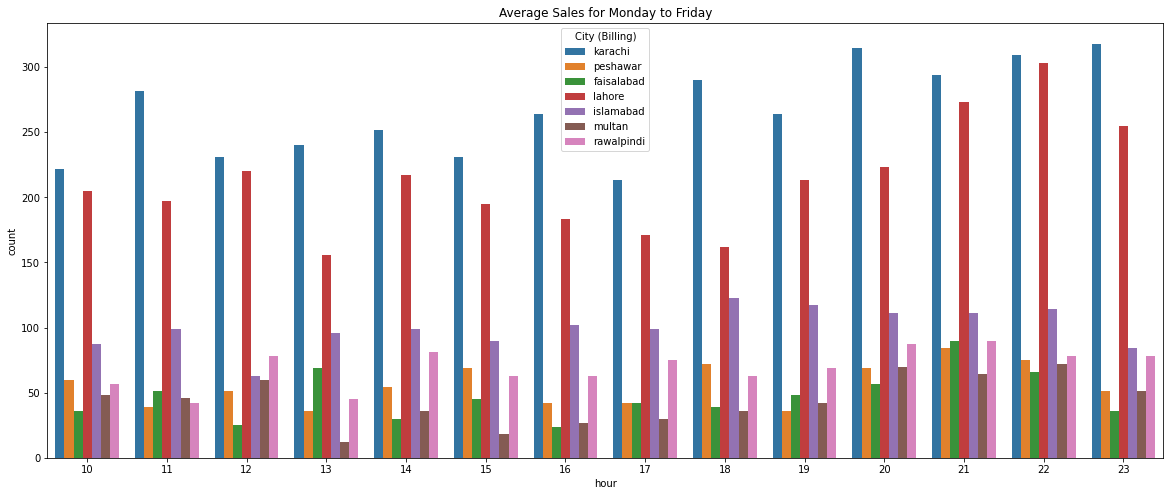

In [15]:
# Average book sales for Monday - Friday
plt.figure(figsize=(20,8))
sns.countplot(data = cities_df[(cities_df['hour'] >= 10) & (cities_df['dayofweek'].isin([0,1,2,3,4]))],
              x = 'hour', hue = 'City (Billing)')
plt.title('Average Sales for Monday to Friday')

We see that the order is somewhat evenly distributed with slightly higher activity taking place in the evening (after 8pm) as we have noticed in the previous trends

Text(0.5, 1.0, 'Average Sales for Monday to Friday')

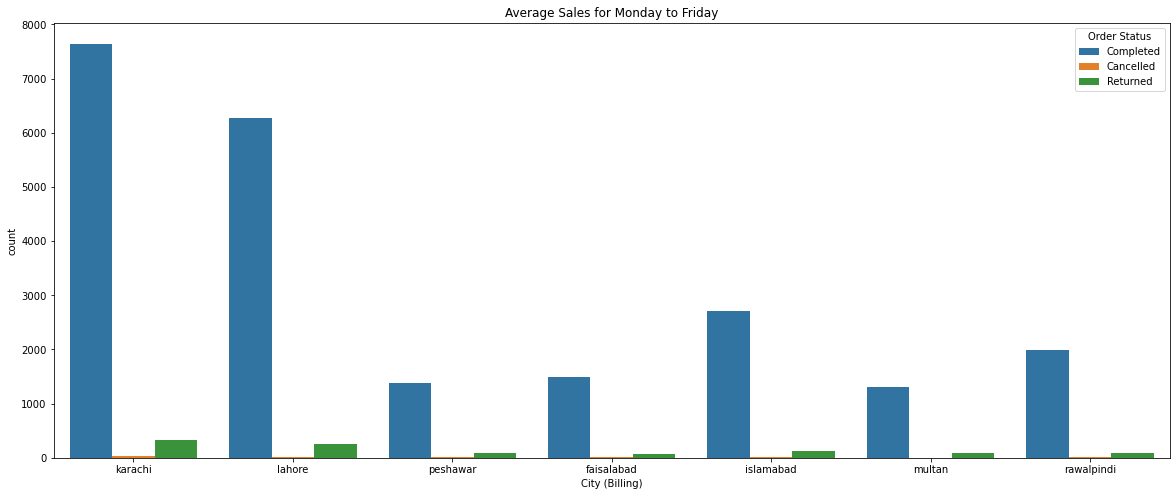

In [16]:
# Order Status by city
plt.figure(figsize=(20,8))
sns.countplot(x = cities_df['City (Billing)'], hue = cities_df['Order Status'])
plt.title('Average Sales for Monday to Friday')

We see that the highest number of completed orders stem from Pakistan's four largest cities: Karachi, Lahore, Islamabad and Rawalpindi. Coincidentally, these cities also hold the highest educated people in the country with the highest amount of schools and universities. 

In [17]:
# Top books by city
cities_df.pivot_table("Order Number", ["Book Name"], 
                      "City (Billing)", 
                      aggfunc = 'count').fillna(0).sort_values('karachi',ascending = False).head(10)

City (Billing),faisalabad,islamabad,karachi,lahore,multan,peshawar,rawalpindi
Book Name,,,,,,,
انٹرنیٹ سے پیسہ کمائیں,142.0,162.0,707.0,480.0,108.0,134.0,147.0
product management,108.0,135.0,468.0,519.0,84.0,105.0,129.0
python programming,135.0,168.0,437.0,483.0,84.0,150.0,147.0
??????? ?? ???? ??????,71.0,81.0,353.0,240.0,54.0,67.0,73.0
artificial intelligence,90.0,81.0,316.0,276.0,63.0,90.0,45.0
"blockchain, cryptocurrency and bitcoin",90.0,114.0,316.0,335.0,78.0,147.0,108.0
justju ka safar-1,45.0,135.0,294.0,282.0,66.0,72.0,105.0
ڈیٹا سائنس ۔ ایک تعارف,38.0,56.0,224.0,158.0,24.0,28.0,52.0
lucky draw - free book,48.0,54.0,186.0,120.0,57.0,18.0,39.0


As shown by the highest book sales by the city, we see that Karachi has the highest sales of "انٹرنیٹ سے پیسہ کمائیں" which is largely the highest, or one of the highest, books sold in each of the largest cities. However, we see that technological books dominate the top 10 highest sold books in the city e.g. Python programming, artificial intelligence, block cryptocurrency and bitcoin and Python programming - release date: August 14 2020. For an online marketplace, it may be important to keep a wide variety of technology books.  

### 6. Issues with the Dataset

During the analysis, we noted several issues with the dataset that will be discussed below

*1) Month skew*

As shown below, we see that February, March and April do not have many transactions. It is important to ensure that the data is complete and that the data has not been tampered with for the months of February to April.

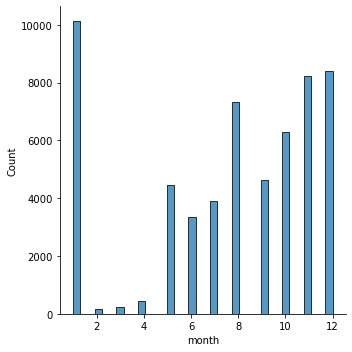

In [28]:
sns.displot(df['month'])

*2) Book Names*

As seen in the prior analysis, the book names are either not complete or cannot be tracket properly. It may be more useful to use the ISBN to track sales as well as place each ISBN in a specific genre. This can be done easily and would greatly improve the quality of the data.

*3) City Names*

As seen during the analysis, the city names are not properly categorized. It is important to ensure that the proper city name is taken for better data quality. An easier way to do this is to use geolocation and grouping areas for better analysis of book sales